<a href="https://colab.research.google.com/github/OptimusJet/OptimusJet/blob/main/Amazon_Fine_Food_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Products Sentiment Analysis
Data file is available online here: https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

<h3> <span style="color:red">In the following example, I used a smaller sub-set of the data; if you like to use the full dataset, please download it from the link above</span></h3> 

### Context
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Data includes: Reviews from Oct 1999 - Oct 2012. 568,454 reviews. 256,059 users. 74,258 products. 260 users with > 50 reviews

## Step 1: Read-in the data

In [ ]:
import pandas as pd
df = pd.read_excel('amazon_reviews.xlsx')
df.head(3)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


### To see complete text from the Text column, set this option: 'display.max_colwidth', None

In [ ]:
# Increase column width so we can see upto 500 characters in the Text column
pd.set_option('display.max_colwidth', 500)
df.Text.head(1)

0    I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Name: Text, dtype: object

We will be using for much of this analysis is “Summary”, “Text”, and “Score.” columns.
- <u>Text:</u> contains complete text of the written review.
- <u>Summary:</u> this is a summary of the written review.
- <u>Score:</u> product rating provided by the customer.

## Step 2: Preview data

Let's take a look at the variable “Score” to see if most of the customer ratings are positive or negative.

In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
marker_line_width=1.5)
fig.update_layout(title_text='Distribution of Scores')
fig.show()

Above we see, most of the customer ratings are positive. Next, let's create word clouds to see the most frequently used words in the reviews.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


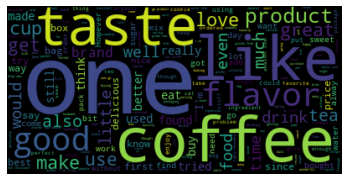

In [ ]:
# Import nltk and download stopwords
import nltk
nltk.download('stopwords')

# If you need to, install wordloud package using the following command:
# conda install -c conda-forge wordcloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create stopword list:
stop_words = set(stopwords.words('english')) 
stop_words.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# If you like to save the png file of word cloud, run the following line
# plt.savefig('wordcloud11.png')
plt.show()

Some popular words that can be observed here include “taste”, "good", and “like” indicate positive sentiment, others are either neutral or not indicative of any sentiment.

## Step 3: Classifying Tweets
In this step, we will classify reviews into “positive” and “negative,” so we can use this astraining data for our sentiment classification model.
Positive reviews will be classified as +1, and negative reviews will be classified as -1.
We will classify all reviews with ‘Score’ > 3 as +1, indicating that they are positive.
All reviews with ‘Score’ < 3 will be classified as -1. Reviews with ‘Score’ = 3 will be dropped, because they are neutral. Our model will only classify positive and negativereviews.

In [ ]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3

df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,1


#### Looking at the head of the data frame now, we can see a new column called ‘sentiment:’

## Step 4: Some more data analysis
Now that we have classified tweets into positive and negative, let’s build wordclouds foreach!
First, we will create two data frames — one with all the positive reviews, and another with all the negative reviews.

In [ ]:
# split df into positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

## Wordcloud — Positive Sentiment

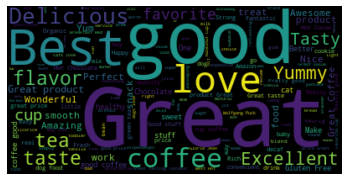

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
## line break and url tags added to stopwords list for removal
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud — Negative Sentiment

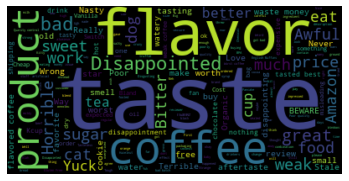

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "good"])
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1> <span style="color:red"> *** Homework 11 Starts Here *** </span></h1> 

<h3> <span style="color:red"> Add a new code cell below. In this code cell follow Homework 11 instructions to do the homework <span style="text-decoration: underline">  </span></span></h3> 